In [52]:
from tensorflow.examples.tutorials.mnist import input_data

In [73]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils

seed = 1
np.random.seed(seed)

In [74]:
from keras import backend
backend.set_image_dim_ordering('th')

In [75]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
no_of_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1], x_test.shape[2])
print("Train Data | Test Data")
print(("{0:^10} | {1:^10}").format(x_train.shape[0], x_test.shape[0]))

Train Data | Test Data
  60000    |   10000   


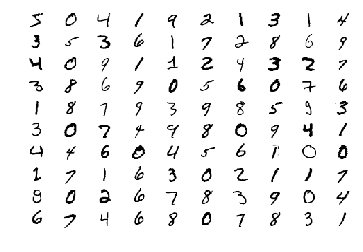

In [76]:
import matplotlib.pyplot as plt
_, axis = plt.subplots(10,10)
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(x_train[i*10+j].reshape(28,28), cmap='Greys')
        axis[i,j].axis('off')

In [77]:
# Normalize images
x_train = x_train / 255
x_test = x_test / 255

In [78]:
print("Before: ", y_train[0])
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print("After:  ", y_train[0])

Before:  5
After:   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [79]:
no_of_classes = y_train.shape[1]
print("Number of classes: ", no_of_classes)

Number of classes:  10


In [82]:
def baseline_model():
    model = Sequential()
    
    model.add(Conv2D(32, (5, 5), kernel_initializer='normal', activation='relu', input_shape=(1,28,28)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [83]:
model = baseline_model()
model.fit(x_train, y_train, epochs=10, batch_size=125)

Epoch 1/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.3498 - acc: 0.8954
Epoch 2/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.1209 - acc: 0.9639
Epoch 3/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0902 - acc: 0.9726
Epoch 4/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0733 - acc: 0.9777
Epoch 5/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0654 - acc: 0.9798
Epoch 6/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0567 - acc: 0.9826
Epoch 7/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0520 - acc: 0.9834
Epoch 8/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0470 - acc: 0.9852
Epoch 9/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0437 - acc: 0.9862
Epoch 10/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0406 - acc: 0.9873

In [84]:
scores = model.evaluate(x_test, y_test)
print("Accuracy: ", scores[1]*100, "%")

10000/10000 [==============================] - 1s 108us/step
Accuracy:  98.87 %


In [125]:
def deeper_model():
    model = Sequential()
    
    model.add(Conv2D(32, (7, 7), kernel_initializer='normal', activation='relu', input_shape=(1,28,28)))
    # model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (5, 5), kernel_initializer='normal', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), kernel_initializer='normal', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [126]:
deeper_model = deeper_model()
deeper_model.fit(x_train, y_train, epochs=10, batch_size=125)

Epoch 1/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.3581 - acc: 0.8839
Epoch 2/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0926 - acc: 0.9736
Epoch 3/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0668 - acc: 0.9808
Epoch 4/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0561 - acc: 0.9843
Epoch 5/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0496 - acc: 0.9867
Epoch 6/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0425 - acc: 0.9885
Epoch 7/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0393 - acc: 0.9891
Epoch 8/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0360 - acc: 0.9897
Epoch 9/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0315 - acc: 0.9910
Epoch 10/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0315 - a

In [127]:
scores = deeper_model.evaluate(x_test, y_test)
print("Accuracy: ", scores[1]*100, "%")

10000/10000 [==============================] - 2s 158us/step
Accuracy:  99.37 %
